In [1]:
#Import the dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
#import the requests library.
import requests

#import the api key
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-28.80669257495319 -151.5411913563539
46.450933670207064 -158.95459239358803
38.83806013727184 -34.68474211407147
81.38363855794765 27.448276684593367
-4.714970410441154 75.56728622335942
50.05747843034814 -155.6987510261247
-6.244954767800294 -164.9888765479829
-46.852533727768225 -2.499942518067428
-86.82684010360184 166.66297563222474
56.52549465260219 24.81274908580471
85.98162417984017 -118.91736538941635
34.130530520466166 -85.62899217011012
77.83436337120114 -118.34391142090242
-21.07366151684306 -136.15389397799908
-67.22509424356683 15.08628487237732
-77.68612924750278 -57.54064320083968
33.02370714164421 97.90074456878284
-61.71532319203406 51.2242392370579
41.73883036519081 -78.75813800896691
57.504990587968905 9.097718370968124
36.94432159233199 -106.85998898491015
71.15002027983641 -63.89215792683787
-16.332115571276603 -38.401555284647515
38.252351890483 -102.77670935764283
-15.760316092023771 -51.87688510858726
65.29020482539767 -24.179707387451515
-65.4324019995167 -17.

In [5]:
from citipy import citipy


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [7]:
# Create a list for holding the cities.
city_data = []

# Create Counters and set them to 1
record_count=1
set_count=1

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 100 == 0 and i >= 100):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | mehamn
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | lielvarde
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | fort payne
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | xining
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | bradford
Processing Record 19 of Set 1 | fjerritslev
Processing Record 20 of Set 1 | durango
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of Set 1 | santa cruz cabralia
Processing Record 23 of Set 1

City not found. Skipping...
Processing Record 90 of Set 2 | san patricio
Processing Record 91 of Set 2 | nuevo progreso
Processing Record 92 of Set 2 | esperance
Processing Record 93 of Set 2 | locri
Processing Record 94 of Set 2 | tasiilaq
Processing Record 95 of Set 2 | ostrovnoy
Processing Record 96 of Set 2 | leeton
Processing Record 97 of Set 2 | barrow
Processing Record 98 of Set 2 | fairbanks
Processing Record 99 of Set 2 | muriwai beach
Processing Record 100 of Set 2 | amderma
City not found. Skipping...
Processing Record 1 of Set 3 | dmitriyevskoye
Processing Record 2 of Set 3 | sobolevo
Processing Record 3 of Set 3 | aswan
Processing Record 4 of Set 3 | biltine
Processing Record 5 of Set 3 | chuguyevka
Processing Record 6 of Set 3 | stromness
Processing Record 7 of Set 3 | bandarbeyla
Processing Record 8 of Set 3 | lompoc
Processing Record 9 of Set 3 | saint-philippe
Processing Record 10 of Set 3 | buon me thuot
City not found. Skipping...
Processing Record 11 of Set 3 | ceda

Processing Record 77 of Set 4 | huescar
Processing Record 78 of Set 4 | kiruna
Processing Record 79 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 80 of Set 4 | ferkessedougou
Processing Record 81 of Set 4 | perivolion
Processing Record 82 of Set 4 | murupara
Processing Record 83 of Set 4 | saint anthony
Processing Record 84 of Set 4 | fort nelson
Processing Record 85 of Set 4 | vetralla
Processing Record 86 of Set 4 | taltal
Processing Record 87 of Set 4 | broken hill
Processing Record 88 of Set 4 | sao joao da barra
Processing Record 89 of Set 4 | wattegama
Processing Record 90 of Set 4 | luorong
Processing Record 91 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 92 of Set 4 | coquimbo
Processing Record 93 of Set 4 | yenagoa
Processing Record 94 of Set 4 | soyo
Processing Record 95 of Set 4 | hofn
Processing Record 96 of Set 4 | general pico
Processing Record 97 of Set 4 | vanavara
Processing Record 98 of Set 4 | waipawa
Processing Record 99

Processing Record 69 of Set 6 | la rioja
Processing Record 70 of Set 6 | gidam
Processing Record 71 of Set 6 | borzna
Processing Record 72 of Set 6 | texarkana
Processing Record 73 of Set 6 | lasa
Processing Record 74 of Set 6 | bilibino
Processing Record 75 of Set 6 | iskateley
Processing Record 76 of Set 6 | yeniseysk
Processing Record 77 of Set 6 | santa cruz
Processing Record 78 of Set 6 | tianpeng
Processing Record 79 of Set 6 | batemans bay
Processing Record 80 of Set 6 | shelburne
Processing Record 81 of Set 6 | altus
Processing Record 82 of Set 6 | rurrenabaque
Processing Record 83 of Set 6 | fiumicino
Processing Record 84 of Set 6 | rawannawi
City not found. Skipping...
Processing Record 85 of Set 6 | tomaszow mazowiecki
Processing Record 86 of Set 6 | doctor pedro p. pena
City not found. Skipping...
Processing Record 87 of Set 6 | tessalit
Processing Record 88 of Set 6 | shakawe
Processing Record 89 of Set 6 | biak
Processing Record 90 of Set 6 | kamaishi
Processing Record 91

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,47.23,61,99,1.92,NZ,2022-10-12 21:18:51
1,Kodiak,57.7900,-152.4072,42.31,61,100,21.85,US,2022-10-12 21:21:12
2,Ribeira Grande,38.5167,-28.7000,72.77,83,6,5.99,PT,2022-10-12 21:21:14
3,Mehamn,71.0357,27.8492,42.75,81,75,19.57,NO,2022-10-12 21:21:15
4,Hithadhoo,-0.6000,73.0833,79.09,81,93,13.20,MV,2022-10-12 21:21:15
5,Cape Town,-33.9258,18.4232,64.11,85,75,18.41,ZA,2022-10-12 21:17:15
6,Bluff,-46.6000,168.3333,47.79,64,99,3.67,NZ,2022-10-12 21:21:18
7,Lielvarde,56.7207,24.8074,41.67,83,47,2.91,LV,2022-10-12 21:21:18
8,Tuktoyaktuk,69.4541,-133.0374,32.00,74,40,12.66,CA,2022-10-12 21:21:19
9,Fort Payne,34.4442,-85.7197,70.21,43,95,10.98,US,2022-10-12 21:21:19


In [10]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-10-12 21:18:51,-46.1927,168.8643,47.23,61,99,1.92
1,Kodiak,US,2022-10-12 21:21:12,57.7900,-152.4072,42.31,61,100,21.85
2,Ribeira Grande,PT,2022-10-12 21:21:14,38.5167,-28.7000,72.77,83,6,5.99
3,Mehamn,NO,2022-10-12 21:21:15,71.0357,27.8492,42.75,81,75,19.57
4,Hithadhoo,MV,2022-10-12 21:21:15,-0.6000,73.0833,79.09,81,93,13.20
...,...,...,...,...,...,...,...,...,...
580,Seydisehir,TR,2022-10-12 21:36:18,37.4193,31.8453,55.36,56,7,2.68
581,Voznesenye,RU,2022-10-12 21:36:20,61.0106,35.4781,45.21,69,100,7.92
582,Buin,CL,2022-10-12 21:36:21,-33.7333,-70.7500,76.87,42,33,7.90
583,Mafinga,TZ,2022-10-12 21:36:22,-7.2500,35.0667,68.77,43,11,3.94


In [13]:
#Create the output file (CSV)
output_data_file="weather_data/cities.csv"
#export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/12/22'

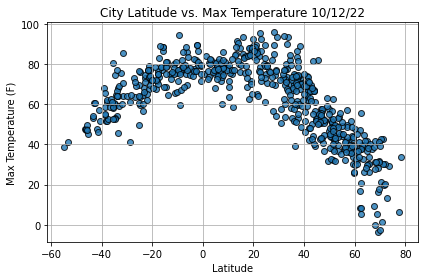

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png",dpi = 300, bbox_inches="tight")

# Show plot.
plt.show()

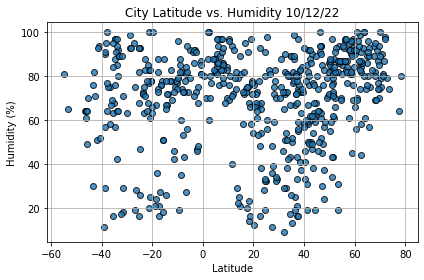

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png",dpi = 300, bbox_inches="tight")

# Show plot.
plt.show()

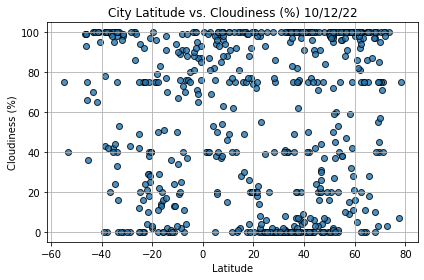

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png",dpi = 300, bbox_inches="tight")
# Show plot.
plt.show()

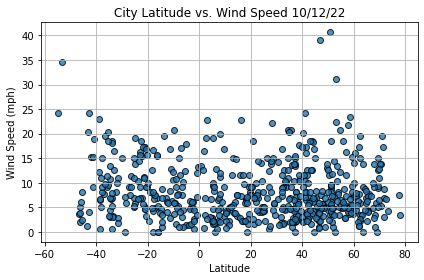

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png",dpi = 300, bbox_inches="tight")

# Show plot.
plt.show()